<div><h2>Лабораторная работа №5 по дисциплине «Методы машинного обучения»</h2>
  по теме: "Линейные модели, SVM и деревья решений"

  Цель лабораторной работы: изучение линейных моделей, SVM и деревьев решений.
  



In [0]:
import os
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
data = pd.read_csv("iris.csv", sep=",")

In [0]:
from sklearn.model_selection import train_test_split
data=data.dropna(axis=0,how='any')
data.head()

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [0]:
data.dtypes

5.1            float64
3.5            float64
1.4            float64
0.2            float64
Iris-setosa     object
dtype: object

In [0]:
#Y = data.drop(data.columns[[0,1,2,3,4,5,6,7,8]],axis="columns")
#X = data.drop(data.columns[[8,9]],axis="columns")
Y = data.drop(data.columns[[0,1,2,3]],axis="columns")
X = data.drop(data.columns[[4]],axis="columns")
#768
data_x_train, data_x_test, data_y_train, data_y_test = train_test_split(X,Y,test_size=0.2,random_state=1)

In [0]:
from sklearn.linear_model import SGDClassifier
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score,precision_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import cohen_kappa_score


class Classifier():
  def __init__(self, method, x_train, y_train, x_test, y_test):
    self._method = method
    self.x_train = x_train
    self.y_train = y_train
    self.x_test = x_test
    self.y_test = y_test
    self.tar1 = []
    self.tar2 = []
  def training(self):
    self._method.fit(self.x_train,self.y_train)
    self.tar1 = self._method.predict(self.x_train)
    self.tar2 = self._method.predict(self.x_test)
  def result(self,metric):
    print(metric(self.y_train,self.tar1)*100)
    print(metric(self.y_test,self.tar2)*100)
  def result_er(self,metric):
    print(metric(self.y_train,self.tar1))
    print(metric(self.y_test,self.tar2))
    

SGD -  реализует регуляризованные линейные модели с обучением по случайному градиентному спуску (SGD): градиент потерь оценивается для каждой выборки за раз, и модель обновляется по мере уменьшения  скорости обучения.

In [0]:
#Линейные модели
sgdlinear = Classifier(SGDClassifier(),data_x_train,data_y_train,data_x_test,data_y_test)
sgdlinear.training()
sgdlinear.result(accuracy_score)
print("___________________________________")
sgdlinear.result(balanced_accuracy_score)
print("___________________________________")
sgdlinear.result(cohen_kappa_score)


72.26890756302521
56.666666666666664
___________________________________
70.27027027027026
66.66666666666666
___________________________________
57.444733420026004
40.90909090909091


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Классификация линейных опорных векторов.

Подобно SVC с параметром kernel = 'linear', но реализован в терминах liblinear, а не libsvm, поэтому он обладает большей гибкостью в выборе штрафов и функций потерь и должен лучше масштабироваться для большого количества выборок.

In [0]:
svmlinear = Classifier(LinearSVC(C=1.0),data_x_train,data_y_train,data_x_test,data_y_test)
svmlinear.training()
svmlinear.result(accuracy_score)
print("___________________________________")
svmlinear.result(balanced_accuracy_score)
print("___________________________________")
svmlinear.result(cohen_kappa_score)

95.7983193277311
100.0
___________________________________
95.4954954954955
100.0
___________________________________
93.66482112436117
100.0


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


модель, которая прогнозирует значение целевой переменной путем изучения простых правил принятия решений, выведенных из функций данных.

Например, в приведенном ниже примере деревья решений учатся на основе данных для аппроксимации синусоиды с набором правил принятия решений if-then-else. Чем глубже дерево, тем сложнее правила принятия решений и тем лучше модель.

In [0]:
dtc = Classifier(DecisionTreeClassifier(random_state=1),data_x_train,data_y_train,data_x_test,data_y_test)
dtc.training()
dtc.result(accuracy_score)
print("___________________________________")

dtc.result(balanced_accuracy_score)
print("___________________________________")
dtc.result(cohen_kappa_score)

100.0
96.66666666666667
___________________________________
100.0
95.23809523809524
___________________________________
100.0
94.79166666666666


### Подбор гиперпараметра К

Linear


In [0]:
n_range = np.array(range(5,95,10))
n_range = n_range/100
tp=[{'l1_ratio':n_range}]
tp

[{'l1_ratio': array([0.05, 0.15, 0.25, 0.35, 0.45, 0.55, 0.65, 0.75, 0.85])}]

In [0]:
from sklearn.model_selection import GridSearchCV

lgscv = GridSearchCV(SGDClassifier(),tp,cv=5,scoring='accuracy')
lgscv.fit(data_x_train,data_y_train)

In [0]:
lgscv.best_params_

{'l1_ratio': 0.45}

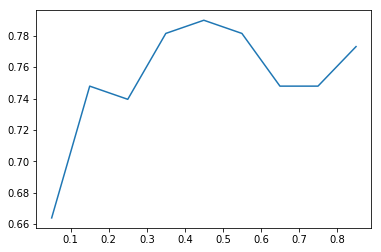

In [0]:
plt.plot(n_range,lgscv.cv_results_['mean_test_score'])

CVM

In [0]:
n_range = np.array(range(1,7,1))
tp=[{'C':n_range}]
tp

[{'C': array([1, 2, 3, 4, 5, 6])}]

In [0]:
cgscv = GridSearchCV(LinearSVC(),tp,cv=5,scoring='accuracy')
cgscv.fit(data_x_train,data_y_train)

In [0]:
cgscv.best_params_

{'C': 3}

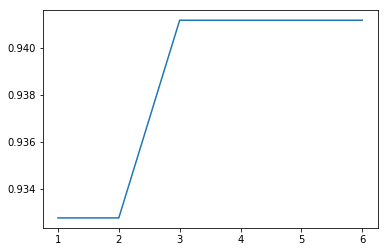

In [0]:
plt.plot(n_range,cgscv.cv_results_['mean_test_score'])

Tree

In [0]:
n_range = np.array(range(1,10,1))
tp=[{'max_depth':n_range}]
tp

[{'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9])}]

In [0]:
tgscv = GridSearchCV(DecisionTreeClassifier(random_state=1),tp,cv=5,scoring='accuracy')
tgscv.fit(data_x_train,data_y_train)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=1,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid=[{'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9])}],
             pre_dispatch='2*n_jobs', refit=True, return_train

In [0]:
tgscv.best_params_

{'max_depth': 3}

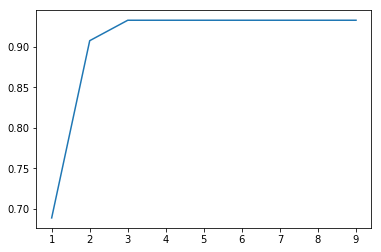

In [0]:
plt.plot(n_range,tgscv.cv_results_['mean_test_score'])

### Сравнение моделей

In [0]:
#Линейные модели
sgdlinear.result(balanced_accuracy_score)
print("___________________________________")
sgdlinear = Classifier(SGDClassifier(l1_ratio=0.85),data_x_train,data_y_train,data_x_test,data_y_test)
sgdlinear.training()
sgdlinear.result(balanced_accuracy_score)

70.27027027027026
66.66666666666666
___________________________________
67.56756756756758
66.66666666666666


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [0]:
#svm
svmlinear.result(balanced_accuracy_score)
print("___________________________________")
svmlinear = Classifier(LinearSVC(C=3),data_x_train,data_y_train,data_x_test,data_y_test)
svmlinear.training()
svmlinear.result(accuracy_score)


95.4954954954955
100.0
___________________________________
95.7983193277311
100.0


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [0]:
#DTC
dtc.result(balanced_accuracy_score)
print("___________________________________")
dtc = Classifier(DecisionTreeClassifier(random_state=3),data_x_train,data_y_train,data_x_test,data_y_test)
dtc.training()
dtc.result(balanced_accuracy_score)



100.0
95.23809523809524
___________________________________
100.0
95.23809523809524
